# Plot zostoga from CMIP5 and CMIP6

In [1]:
import sys

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

sys.path.append('../code/')
import mod_loc as loc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
data_dir = '../outputs/'

In [3]:
ls {data_dir}

archive/                cmip5_zos_rcp85/        cmip6_zos_ssp245/
cmip5_zos_historical/   cmip5_zostoga/          cmip6_zos_ssp585/
cmip5_zos_rcp26/        cmip5_zostoga_withDisc/ cmip6_zostoga/
cmip5_zos_rcp45/        cmip6_zos_historical/
cmip5_zos_rcp60/        cmip6_zos_ssp126/


In [4]:
def read_combine_zostoga_cmip6(sce):
    '''Read and combine zostoga data'''
    
    hist_ds = xr.open_mfdataset(f'{data_dir}/cmip6_zostoga/cmip6_zostoga_historical_1900_2014.nc')
    sce_ds = xr.open_mfdataset(f'{data_dir}/cmip6_zostoga/cmip6_zostoga_{sce}_2015_2099.nc')
    tot_ds = xr.concat([hist_ds,sce_ds],'time').sel(model=sce_ds.model)
    
    return tot_ds

def read_combine_zostoga_cmip5(sce):
    '''Read and combine zostoga data'''
    
    hist_ds = xr.open_mfdataset(f'{data_dir}/cmip5_zostoga/cmip5_zostoga_historical_1900_2005.nc')
    sce_ds = xr.open_mfdataset(f'{data_dir}/cmip5_zostoga/cmip5_zostoga_{sce}_2006_2100.nc')
    tot_ds = xr.concat([hist_ds,sce_ds],'time').sel(model=sce_ds.model)
    
    return tot_ds

def plot_all(zostoga_ds):
    fig, axes = plt.subplots(ncols=1)
    for mod in zostoga_ds.model:
        zostoga_ds.zostoga_corrected.sel(model=mod).plot(ax=axes, label=mod.values)
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    display(fig)
    plt.close()

### Check CMIP5 data

### Results for rcp26
18 models available
Mean and 5-95 percentile range: 
Year 2099
0.14303367551889315 [ 0.10128118975236072 - 0.18478616128542558 ]
Year 2081-2099
0.1349000468520168 [ 0.09705564964405078 - 0.17274444405998285 ]


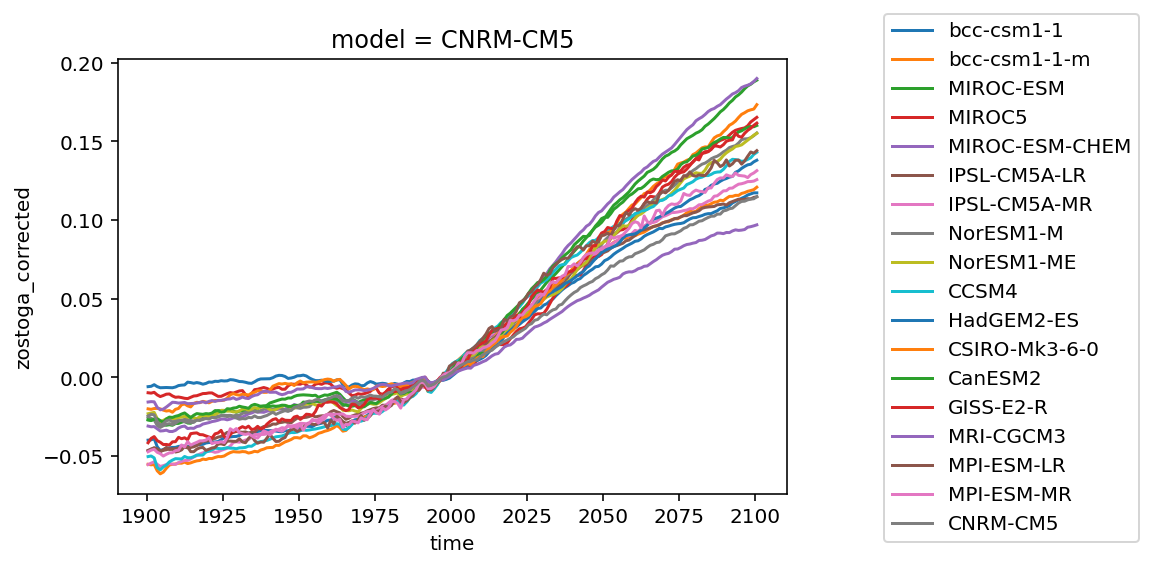

### Results for rcp45
24 models available
Mean and 5-95 percentile range: 
Year 2099
0.19323561256115096 [ 0.14888935699220446 - 0.23758186813009746 ]
Year 2081-2099
0.17720451281448724 [ 0.1374653202568314 - 0.21694370537214303 ]


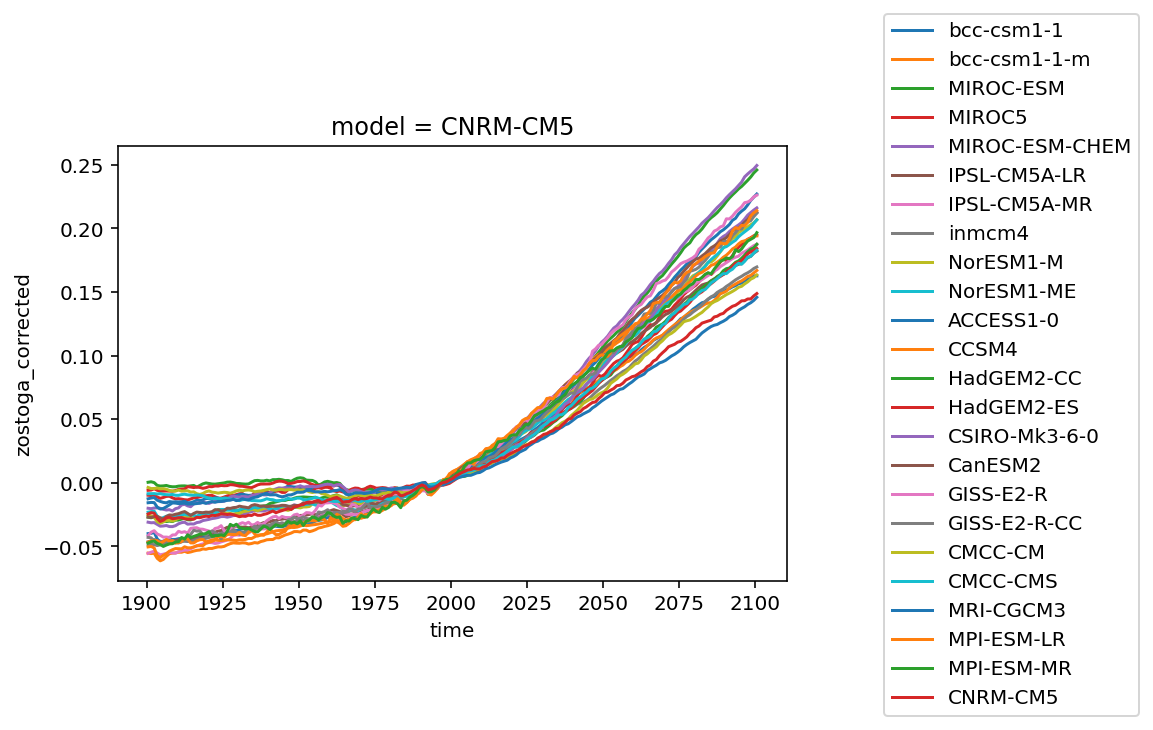

### Results for rcp85
24 models available
Mean and 5-95 percentile range: 
Year 2099
0.308129491109108 [ 0.25317064660648947 - 0.3630883356117265 ]
Year 2081-2099
0.26776922167101314 [ 0.22012245192469249 - 0.31541599141733373 ]


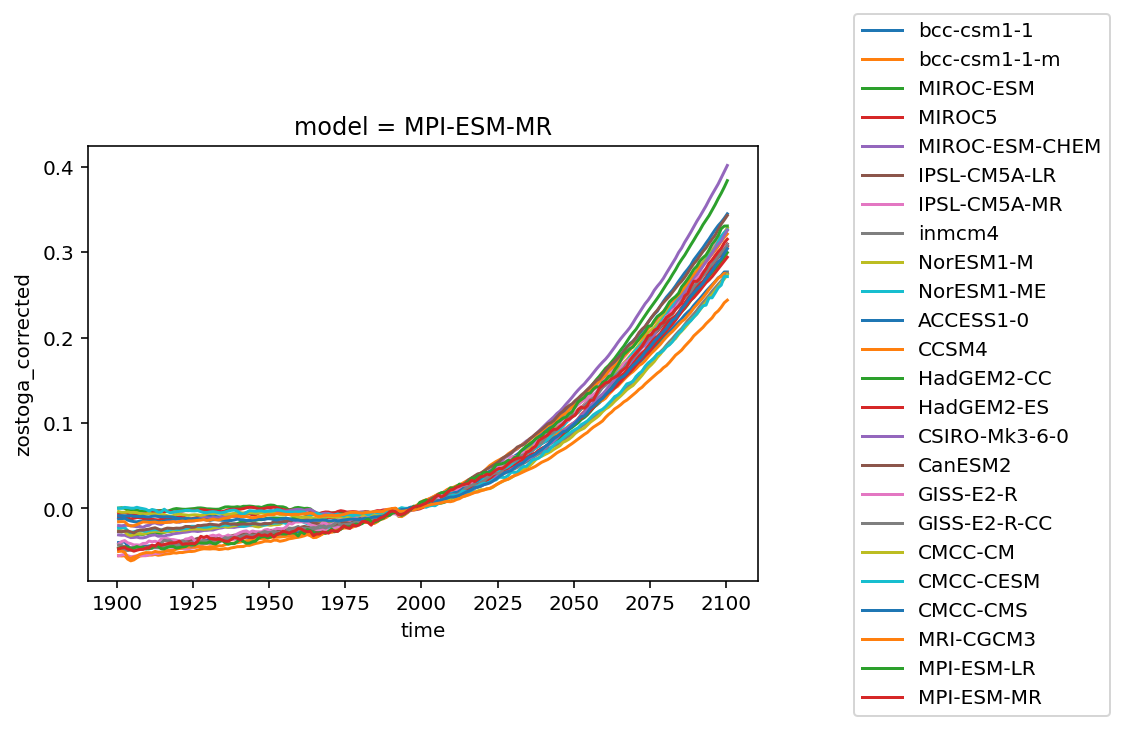

In [5]:
for sce in ['rcp26', 'rcp45', 'rcp85']:
    print(f'### Results for {sce}')
    zostoga_ds = read_combine_zostoga_cmip5(sce)
    print(f'{len(zostoga_ds.model)} models available')
    loc.print_results_da(zostoga_ds.zostoga_corrected)
    plot_all(zostoga_ds)

### Check CMIP6 data

### Results for ssp119
7 models available
Mean and 5-95 percentile range: 
Year 2099
0.14327824523263538 [ 0.11549068830652022 - 0.17106580215875056 ]
Year 2081-2099
0.1355996274511036 [ 0.11027252028946212 - 0.160926734612745 ]


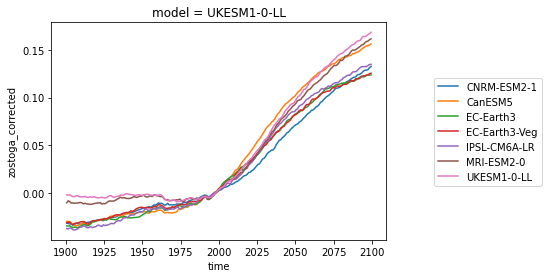

### Results for ssp126
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.16029443616417705 [ 0.10993681847880826 - 0.21065205384954583 ]
Year 2081-2099
0.14984695337214135 [ 0.10401602159297149 - 0.19567788515131118 ]


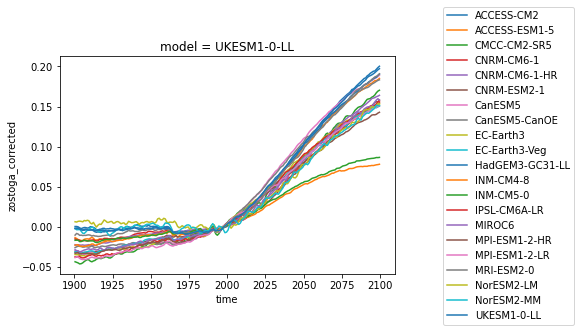

### Results for ssp245
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.2141332708628882 [ 0.15257698530872066 - 0.2756895564170557 ]
Year 2081-2099
0.1924010250540561 [ 0.13727307276288703 - 0.24752897734522522 ]


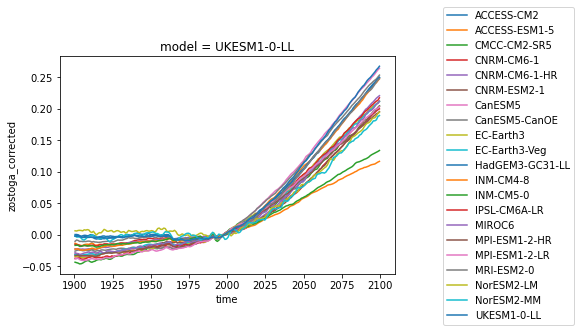

### Results for ssp585
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.3207339440225613 [ 0.2225699678933501 - 0.41889792015177246 ]
Year 2081-2099
0.27288900398378224 [ 0.19079388879116718 - 0.35498411917639733 ]


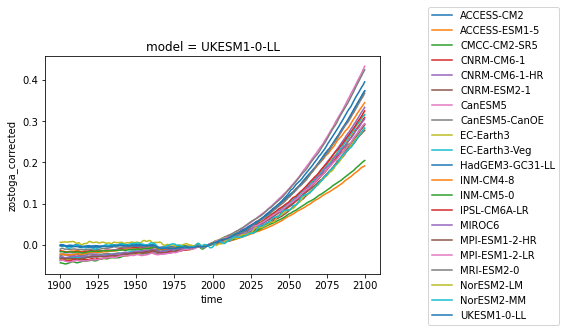

In [42]:
for sce in ['ssp119', 'ssp126', 'ssp245', 'ssp585']:
    print(f'### Results for {sce}')
    zostoga_ds = read_combine_zostoga_cmip6(sce)
    print(f'{len(zostoga_ds.model)} models available')
    loc.print_results_da(zostoga_ds.zostoga_corrected)
    plot_all(zostoga_ds)

In [26]:
zostoga_ds.model

<xarray.DataArray 'model' (model: 7)>
array(['CNRM-ESM2-1', 'CanESM5', 'EC-Earth3', 'EC-Earth3-Veg', 'IPSL-CM6A-LR',
       'MRI-ESM2-0', 'UKESM1-0-LL'], dtype=object)
Coordinates:
  * model    (model) object 'CNRM-ESM2-1' 'CanESM5' ... 'UKESM1-0-LL'

# Compare results with published literature:
- Jevrejeva et al. 2020
- Hermans et al. 2021

In [25]:
zostoga_ds.zostoga_corrected.plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

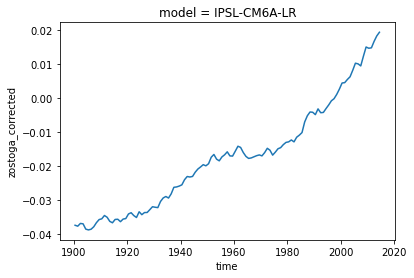

In [17]:
hist_ds.zostoga_corrected.sel(model='IPSL-CM6A-LR').plot()

### Compare all scenarios